In [1]:
#Sampling and Reconstruction


Base Band Signal


In [2]:
#Libraries required
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy import signal

50


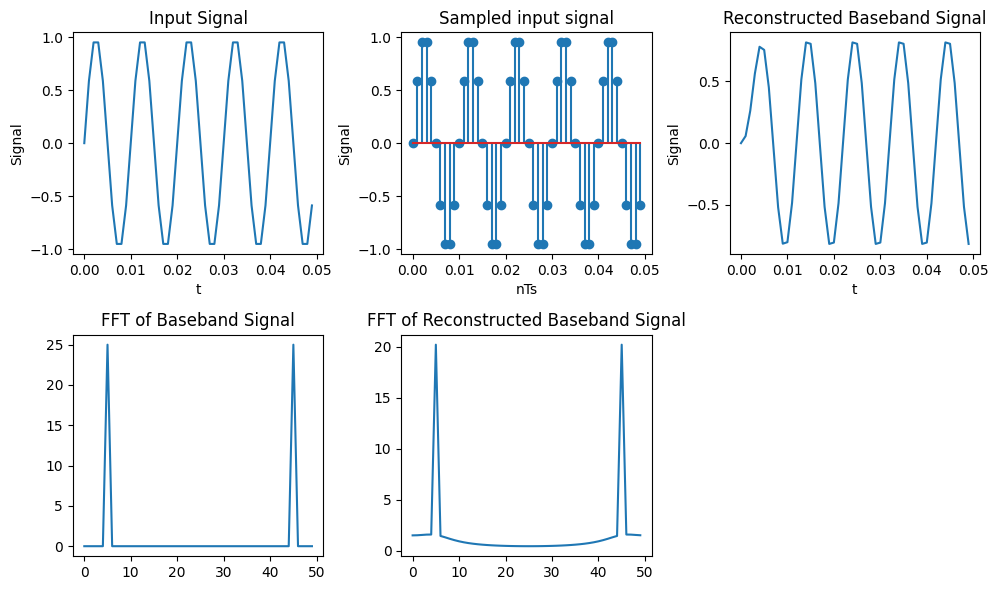

In [18]:
fbp = 100 #Base band signal frequency(Hz)
M = 10
fs = M * fbp #Sampling frequency(Hz) (fs>2fm)
T = 1 / fbp #Time period for Base band signal
T_L = np.arange(0, 5 * T, T / M)  #plotting points for base band signal

X = np.sin(np.pi * 2 * fbp * T_L) #base band signal

fig, axs = plt.subplots(2 , 3 , figsize = (10 , 6)) #for aranging the graph 

#plotting of base band signal
axs[0,0].plot(T_L,X)
axs[0,0].set_title('Input Signal')
axs[0,0].set_xlabel('t')
axs[0,0].set_ylabel('Signal')

Ts = 1 / fs #Sampling time
Ts_L = np.arange(0, 5 * T, Ts) #sampling time points

Xs = np.sin(np.pi * 2 * fbp * Ts_L) #sampled signal

#plotting of sampled signal
axs[0,1].stem(Ts_L,Xs)
axs[0,1].set_title('Sampled input signal')
axs[0,1].set_xlabel('nTs')
axs[0,1].set_ylabel('Signal')

#Reconstructing baseband signal
Wp = (fs / 4) / fs  # pass-band frequency
Ws = (fs - 10) / fs #stop band Frequency

Gpb = 3 #passband gain in db
Gsb = 60 #stopband gain in db

[N, Wn] = signal.buttord(Wp, Ws, Gpb, Gsb) #using butterworth filter order selector

[b,a] = signal.butter(N, Wn, 'low') #LPF constants
Xr = signal.lfilter(b, a, Xs) #Reconstruction of Signal 
axs[0, 2].plot(T_L, Xr)
axs[0, 2].set_title("Reconstructed Baseband Signal")
axs[0, 2].set_xlabel("t")
axs[0, 2].set_ylabel("Signal")

X_f = fft(X) 
axs[1, 0].plot(abs(X_f))
axs[1, 0].set_title("FFT of Baseband Signal")

Xr_f=fft(Xr)  
axs[1, 1].plot(abs(Xr_f))
axs[1, 1].set_title("FFT of Reconstructed Baseband Signal")

axs[1, 2].axis('off')

plt.tight_layout()

Pass Band Signal


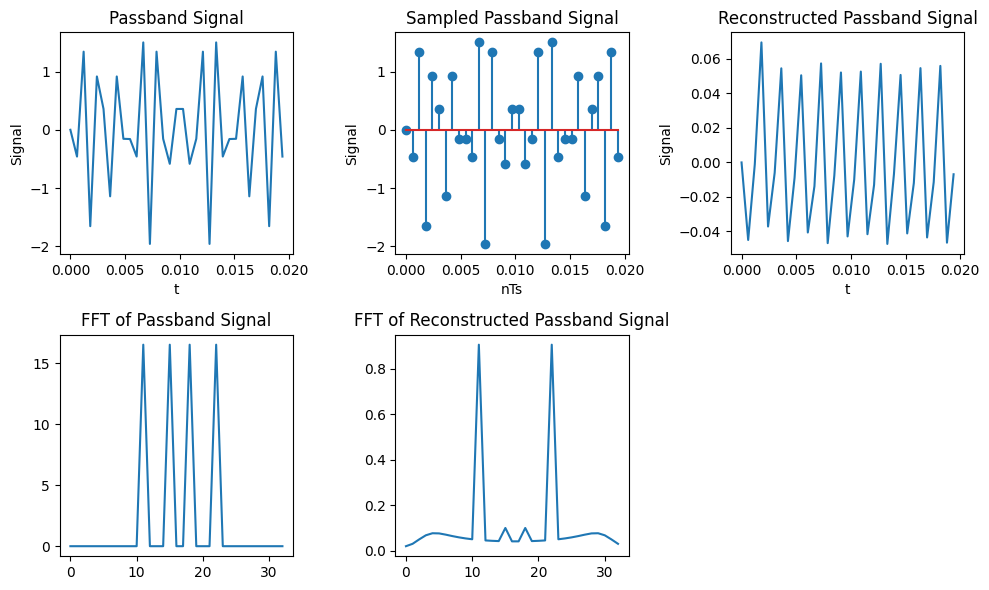

In [38]:
Fpb = 100  #pass band frequency
M1 = 1.5 #Nyquist constant
A = 1  #Amplitude of Pass band signal
fc = 1000 #Carrier Frequency in Hertz
Ac = 2 # Carrier signal amplitude
fs = M1 * (fc + Fpb) # Sampling frequency
T = 1 / Fpb #Time period of input signal
Ts1 = 1 / fs  # Sampling Period
t1 = np.arange(0, 2 * T, Ts1) #pass band signal plot points (we use Ts instead of T this to match the size of the array)
ts1 = np.arange(0, 2 * T, Ts1) #Sampled signal plot points
x1 = A * np.sin(2 * np.pi * Fpb * t1)  #Passband signal
xc1 = Ac * np.sin(2 * np.pi * fc * ts1)  #carrier Signal
X1 = np.multiply(x1,xc1) #Resulting Passband Signal

#plotting all graphs side by side
fig, axs = plt.subplots(2, 3, figsize= (10 ,6))

axs[0, 0].plot(t1,X1)  #passband Signal
axs[0, 0].set_title('Passband Signal')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('Signal')

xs1 = A * np.sin(2 * np.pi * Fpb * ts1) #Sampled Passband signal
xcs1 = Ac * np.sin(2 * np.pi* fc * ts1) #sampled Carrier Signal
Xs1 = np.multiply(xs1,xcs1) # Resulting sampled pass band signal

axs[0, 1].stem(ts1,Xs1) #sampled passband signal
axs[0, 1].set_title('Sampled Passband Signal')
axs[0, 1].set_xlabel('nTs')
axs[0, 1].set_ylabel('Signal')

#using the same values for the butterwoth filter in the abve section
Xr1 = signal.lfilter(b,a,Xs1) #reconstruction of passband signal
axs[0, 2].plot(t1,Xr1) #reconstructed passband signal plotting.
axs[0, 2].set_title('Reconstructed Passband Signal')
axs[0, 2].set_xlabel('t')
axs[0, 2].set_ylabel('Signal')

X_f1 = fft(X1)  #FFT of passband signal
axs[1, 0].plot(abs(X_f1)) #Plotting FFT signal
axs[1, 0].set_title("FFT of Passband Signal")

Xr_f1 = fft(Xr1) #FFt of reconstructed signal
axs[1, 1].plot(abs(Xr_f1)) #Plotting FFT signal.
axs[1, 1].set_title("FFT of Reconstructed Passband Signal")

axs[1, 2].axis('off')
plt.tight_layout()
